# Plotting with `qha-cij`

This tutorial demostrate how to programmingly invoke `qha-cij` package in Python, and how to plot with it.

## Load the configuration and run the `Calculator`

In [1]:
import cij.core.calculator


calculator = cij.core.calculator.Calculator("_attachments/plotting/config.yml")

/Users/chazeon/Documents/Projects/qha-cij-2/cij/core/phonon_modulus.py:88: RuntimeWarning: divide by zero encountered in true_divide
  return  h_div_k * (self.freq_array[nax,:,:,:] / self.t_array[:,nax,nax,nax])
/Users/chazeon/Documents/Projects/qha-cij-2/cij/core/phonon_modulus.py:88: RuntimeWarning: invalid value encountered in true_divide
  return  h_div_k * (self.freq_array[nax,:,:,:] / self.t_array[:,nax,nax,nax])
/Users/chazeon/Documents/Projects/qha-cij-2/cij/core/phonon_modulus.py:96: RuntimeWarning: overflow encountered in exp
  return self.Q ** 2 * numpy.exp(self.Q) / (numpy.exp(self.Q) - 1) ** 2
/Users/chazeon/Documents/Projects/qha-cij-2/cij/core/phonon_modulus.py:96: RuntimeWarning: overflow encountered in square
  return self.Q ** 2 * numpy.exp(self.Q) / (numpy.exp(self.Q) - 1) ** 2
/Users/chazeon/Documents/Projects/qha-cij-2/cij/core/phonon_modulus.py:96: RuntimeWarning: invalid value encountered in true_divide
  return self.Q ** 2 * numpy.exp(self.Q) / (numpy.exp(self.Q

## Plotting elastic moduli

Here we prepare a plot for $c_{ij}$ for forsterite.

In [9]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi']= 144
import matplotlib.pyplot as plt
import numpy

In [3]:
# Prepare color scale as a function of temperature, eventually this should go to cij.plot

from palettable.cartocolors.sequential import agSunset_7

palette = agSunset_7
norm = matplotlib.colors.Normalize(vmin=0, vmax=3000)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=palette.mpl_colormap)

In [4]:
from cij.util import units

p_array = units.Quantity(
    calculator.qha_calculator.pressure_base.p_array,
    units.rydberg / units.bohr ** 3).to(units.GPa).magnitude
t_array = calculator.qha_calculator.t_array

p_indices = calculator.qha_calculator.pressure_base.volumes < numpy.max([
        volume.volume for volume in calculator.qha_input.volumes
    ])
p_indices = numpy.ones(calculator.qha_calculator.pressure_base.volumes.shape, dtype=bool)

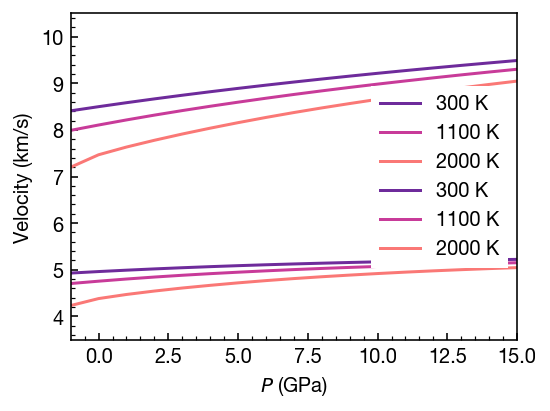

In [13]:
plt.figure(figsize=(4, 3))

for velocity in [
    calculator.pressure_base.primary_velocities,
    calculator.pressure_base.secondary_velocities
]:

    for i in [3, 11, 20]:
        t = t_array[i]
        plt.plot(p_array[p_indices[i,:]], velocity[i, p_indices[i,:]], label=f"{t} K", c=cmap.to_rgba(t))

plt.legend()
plt.xlabel("$P$ (GPa)")
plt.ylabel(r"Velocity (km/s)")
plt.ylim(3.5, 10.5)
plt.xlim(-1, 15)

plt.show()